In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
from collections import defaultdict
import matplotlib.dates as mdates
from sklearn import preprocessing


In [9]:
url = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatraining.csv'
df = pd.read_csv(url) 

url_test1 = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatest.csv'
df_test1 =pd.read_csv(url_test1)

url_test2 = 'https://raw.githubusercontent.com/ZioTrib/dm2proj/master/datatest2.csv'
df_test2 =pd.read_csv(url_test2)

In [28]:
df['date'] = pd.to_datetime(df['date'])
df_test1['date'] = pd.to_datetime(df_test1['date'])
df_test2['date'] = pd.to_datetime(df_test2['date'])

# Data Preparation

In [16]:
df['Weekday']=df['date'].apply(lambda x:x.weekday())
df_test1['Weekday']=df_test1['date'].apply(lambda x:x.weekday())
df_test2['Weekday']=df_test2['date'].apply(lambda x:x.weekday())

df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Weekday
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1,2
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1,2
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1,2
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1,2
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1,2
...,...,...,...,...,...,...,...,...
8138,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,1
8139,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,1
8140,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,1
8141,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1,1


In [30]:
day1=df[['date','Light','Occupancy']][df['Weekday']==0].copy()
day2=df[['date','Light','Occupancy']][df['Weekday']==1].copy()
day3=df[['date','Light','Occupancy']][df['Weekday']==2].copy()
day4=df[['date','Light','Occupancy']][df['Weekday']==3].copy()
day5=df[['date','Light','Occupancy']][df['Weekday']==4].copy()
day6=df[['date','Light','Occupancy']][df['Weekday']==5].copy()
day7=df[['date','Light','Occupancy']][df['Weekday']==6].copy()
    
weekdays_train = [day4,day5,day6,day7,day1]

day1_t1=df_test1[['date','Light','Occupancy']][df_test1['Weekday']==0].copy()
day2_t1=df_test1[['date','Light','Occupancy']][df_test1['Weekday']==1].copy()  
day3_t1=df_test1[['date','Light','Occupancy']][df_test1['Weekday']==2].copy()
day4_t1=df_test1[['date','Light','Occupancy']][df_test1['Weekday']==3].copy()
day5_t1=df_test1[['date','Light','Occupancy']][df_test1['Weekday']==4].copy()
day6_t1=df_test1[['date','Light','Occupancy']][df_test1['Weekday']==5].copy()
day7_t1=df_test1[['date','Light','Occupancy']][df_test1['Weekday']==6].copy()
    
weekdays_test1 = [day1_t1,day2_t1,day3_t1]

day1_t2=df_test2[['date','Light','Occupancy']][df_test2['Weekday']==0].copy()
day2_t2=df_test2[['date','Light','Occupancy']][df_test2['Weekday']==1].copy() 
day3_t2=df_test2[['date','Light','Occupancy']][df_test2['Weekday']==2].copy() 
day4_t2=df_test2[['date','Light','Occupancy']][df_test2['Weekday']==3].copy()
day5_t2=df_test2[['date','Light','Occupancy']][df_test2['Weekday']==4].copy()
day6_t2=df_test2[['date','Light','Occupancy']][df_test2['Weekday']==5].copy()
day7_t2=df_test2[['date','Light','Occupancy']][df_test2['Weekday']==6].copy()
    
weekdays_test2 = [day4_t2,day5_t2,day6_t2,day7_t2,day1_t2]


In [31]:
day_l= []
day0_l=[]
day_t1_l=[]
day_t2_l= []
for day in weekdays_train:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['date'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day0_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)
        
for day in weekdays_test1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['date'].apply(lambda x: str(x)[11:19])
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day_t1_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) 

for day in weekdays_test2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['date'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True) 
        day_l.append(ts)
        day_t2_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) 


In [32]:
split = 2 
part_size = 60 // split
day0_split = []
day_t1_split = []
day_t2_split = []

for ts in day0_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i    
        day0_split.append(day_div)
        
for ts in day_t1_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t1_split.append(day_div)
    
for ts in day_t2_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t2_split.append(day_div)

for day in day0_split:
    day.reset_index(drop=True, inplace=True) 
for day in day_t1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_t2_split:
    day.reset_index(drop=True, inplace=True)


C:\Users\salva\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\salva\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\salva\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

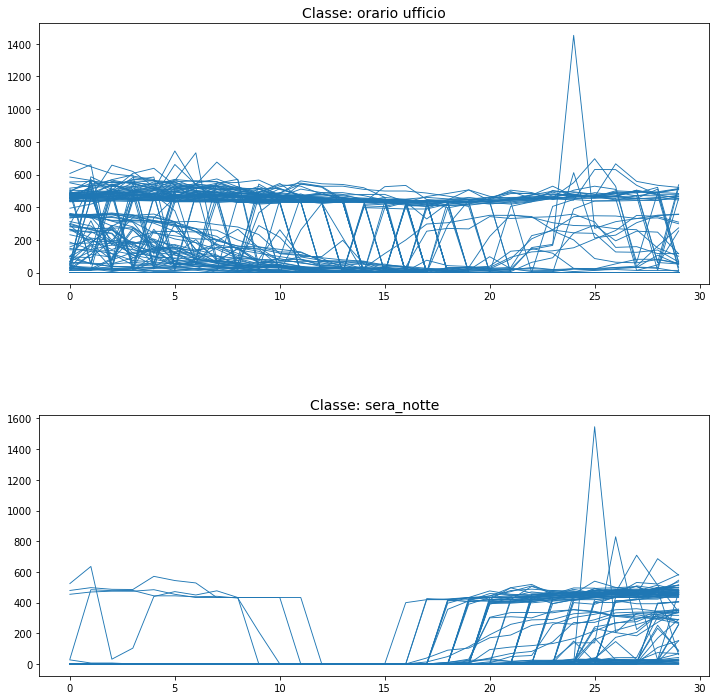

In [654]:
ts_l= []
ts_arr = []

for i in day0_split:
    ts = i['Light'].copy()
    ts_l.append(ts)

ts_size = len(day0_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
X_train = np.array(ts_arr)

def divide_day(ts): 
     if ts['date'][ts.index[ts_size//2]].hour <= 19 and ts['date'][ts.index[ts_size//2]].hour >= 7:
        return 'orario ufficio'
     else:
        return 'sera_notte'
    
labels = np.array([divide_day(i) for i in day0_split])

y_train = preprocessing.LabelEncoder().fit_transform(labels)
plt.figure(figsize=(12,12))

for i, classe in enumerate(['orario ufficio', 'sera_notte']):
    plt.subplot(2, 1, i + 1)
    for x in X_train[labels == classe]:
        plt.plot(x, color='C0',linewidth=0.9)
    plt.title('Classe: {}'.format(classe), fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()


In [655]:
ts_l = []
ts_arr = []

for i in day_t1_split:
    ts = i['Light'].copy()
    ts_l.append(ts)

ts_size = len(day_t1_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))

X_test1 = np.array(ts_arr)
y_test1 = preprocessing.LabelEncoder().fit_transform(labels)


In [656]:
ts_l = []
ts_arr = []

for i in day_t2_split:
    ts = i['Light'].copy()
    ts_l.append(ts)

    ts_size = len(day_t2_split[1])
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
    
X_test2 = np.array(ts_arr)
y_test2 = preprocessing.LabelEncoder().fit_transform(labels)

In [657]:
y_test1.shape, X_test1.shape

((240,), (86, 30))

In [658]:
X_train.shape, y_train.shape

((240, 30), (240,))

In [659]:
X_test2.shape, y_test2.shape

((240, 30), (240,))

# Shapelet Discovery

https://tslearn.readthedocs.io/en/latest/gen_modules/shapelets/tslearn.shapelets.ShapeletModel.html#tslearn.shapelets.ShapeletModel

https://www.kaggle.com/group16/shapelets

In [660]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [661]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 240
ts_sz 30
n_classes 2
shapelet_sizes {3: 3}


In [23]:
keys = sorted(shapelet_sizes.keys())
shapelet_sizes[keys] 

TypeError: unhashable type: 'list'

In [662]:
X_train.shape,y_train.shape

((240, 30), (240,))

In [663]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=100,
                        verbose=1)

In [664]:
shp_clf.fit(X_train, y_train)

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Epoch 1/100
240/240 [==============================] - 2s 7ms/step - loss: 0.7024 - binary_accuracy: 0.3750 - binary_crossentropy: 0.6933
Epoch 2/100
240/240 [==============================] - 2s 7ms/step - loss: 0.7023 - binary_accuracy: 0.3750 - binary_crossentropy: 0.6932
Epoch 3/100
240/240 [==============================] - 2s 9ms/step - loss: 0.7021 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6930
Epoch 4/100
240/240 [==============================] - 2s 7ms/step - loss: 0.7020 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6929
Epoch 5/100
240/240 [==============================] - 2s 9ms/step - loss: 0.7018 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6927
Epoch 6/100
240/240 [==============================] - 2s 8ms/step - loss: 0.7016 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6926
Epoch 7/100
240/240 [==============================] - 2s 9ms/step - loss: 0.7015 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6924
Epoch 8/100
240/240 [=============

Epoch 60/100
240/240 [==============================] - 2s 9ms/step - loss: 0.6942 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6853
Epoch 61/100
240/240 [==============================] - 2s 9ms/step - loss: 0.6940 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6852
Epoch 62/100
240/240 [==============================] - 2s 10ms/step - loss: 0.6939 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6850
Epoch 63/100
240/240 [==============================] - 2s 10ms/step - loss: 0.6938 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6849
Epoch 64/100
240/240 [==============================] - 2s 9ms/step - loss: 0.6937 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6848
Epoch 65/100
240/240 [==============================] - 2s 10ms/step - loss: 0.6936 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6847
Epoch 66/100
240/240 [==============================] - 2s 9ms/step - loss: 0.6934 - binary_accuracy: 0.6250 - binary_crossentropy: 0.6846
Epoch 67/100
240/240 [==

ShapeletModel(batch_size=256, max_iter=100, n_shapelets_per_size={3: 3},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [665]:
predicted_labels = shp_clf.predict(X_train)
y_pred = shp_clf.predict(X_test2)
print("Correct classification rate:", accuracy_score(y_test2, y_pred))

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


240/240 [==============================] - 2s 7ms/step
Correct classification rate: 0.625


In [666]:
predicted_locations = shp_clf.locate(X_train)
distances = shp_clf.transform(X_train)

C:\Users\salva\anaconda3\lib\site-packages\tslearn\utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 240 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


240/240 [==============================] - 2s 7ms/step


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


240/240 [==============================] - 2s 6ms/step


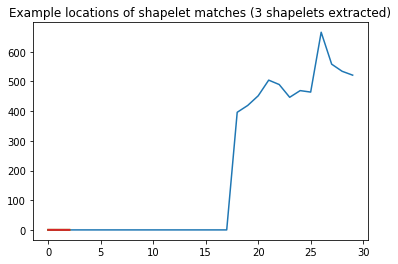

In [667]:
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "({} shapelets extracted)".format(n_shapelets))

test_ts_id = np.argmin(np.sum(distances, axis=1))
plt.plot(X_train[test_ts_id].ravel())

for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[test_ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

In [668]:
n_shapelets

3

In [669]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.625
F1-score [0.76923077 0.        ]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       150
           1       0.00      0.00      0.00        90

    accuracy                           0.62       240
   macro avg       0.31      0.50      0.38       240
weighted avg       0.39      0.62      0.48       240



C:\Users\salva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Shaplet Discovery 3

In [27]:
pip install pyts

Note: you may need to restart the kernel to use updated packages.


In [193]:
from pyts.transformation import ShapeletTransform

https://pyts.readthedocs.io/en/stable/generated/pyts.transformation.ShapeletTransform.html#pyts.transformation.ShapeletTransform

In [672]:
st = ShapeletTransform(n_shapelets=3, window_sizes=[12],criterion='anova')
st.fit(X_train, y_train)

ShapeletTransform(criterion='anova', n_jobs=None, n_shapelets=3,
                  random_state=None, remove_similar=True, sort=False, verbose=0,
                  window_sizes=[12], window_steps=None)

In [673]:
len(st.shapelets_)

3

In [674]:
st.shapelets_

array([[345.5       , 360.        , 333.        , 336.        ,
        310.5       , 312.66666667, 293.5       , 278.75      ,
        232.5       , 115.        , 105.        ,  90.5       ],
       [356.        , 354.25      , 352.66666667, 344.33333333,
        318.5       , 291.        , 252.        , 221.66666667,
        139.        , 118.        ,  97.75      ,  77.5       ],
       [357.5       , 355.75      , 364.5       , 349.        ,
        341.        , 308.75      , 268.25      , 193.5       ,
        163.        , 142.5       ,  37.        ,  10.5       ]])

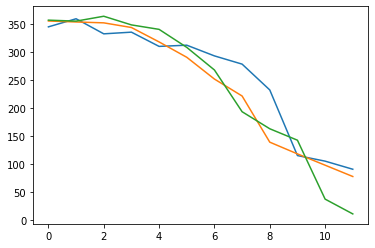

In [675]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

In [676]:
st.indices_

array([[137,   1,  13],
       [117,   0,  12],
       [123,   0,  12]], dtype=int64)

In [161]:
X_train[0]

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  , 396.  , 419.  , 451.5 , 504.25, 489.5 , 446.5 ,
       469.  , 464.  , 665.5 , 558.  , 534.  , 521.  ])

In [677]:
st.scores_

array([209.02783223, 210.77122633, 221.05831491])

## Shaplet Discovery 4

In [583]:
from pyts.classification import LearningShapelets

https://pyts.readthedocs.io/en/stable/generated/pyts.classification.LearningShapelets.html#pyts.classification.LearningShapelets

In [678]:
shp_clf = LearningShapelets(random_state=42, tol=0.01,verbose=1)

In [679]:
shp_clf.fit(X_train, y_train)

Iteration 0: loss = 10.158818
Iteration 1: loss = 7.510364
Iteration 2: loss = 5.462924
Iteration 3: loss = 4.514085
Iteration 4: loss = 3.889559
Iteration 5: loss = 3.729657
Iteration 6: loss = 3.651522
Iteration 7: loss = 3.651259


LearningShapelets(C=1000, alpha=-100, class_weight=None, fit_intercept=True,
                  intercept_scaling=1.0, learning_rate=1.0, max_iter=1000,
                  min_shapelet_length=0.1, multi_class='multinomial',
                  n_jobs=None, n_shapelets_per_size=0.2, penalty='l2',
                  random_state=42, shapelet_scale=3, tol=0.01, verbose=1)

In [680]:
y_pred = shp_clf.predict(X_test2)

In [681]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.825
F1-score [0.84328358 0.80188679]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       150
           1       0.70      0.94      0.80        90

    accuracy                           0.82       240
   macro avg       0.83      0.85      0.82       240
weighted avg       0.86      0.82      0.83       240



In [682]:
len(shp_clf.shapelets_[0])

18

In [683]:
from pyts.utils import windowed_view

In [684]:
# Select four shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1],
                           shp_clf.shapelets_[0, 2]])

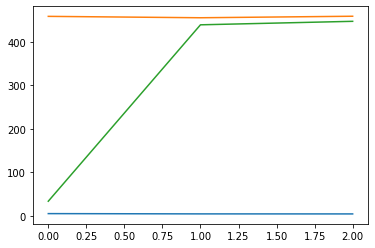

In [686]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [687]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[1]
X_window = windowed_view(X_train, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 2, axis=3).min(axis=1)

In [688]:
X_dist

array([[2.28480194e+01, 1.19740792e+02, 1.25908126e+03],
       [2.28480194e+01, 1.30231658e+02, 5.45141604e+04],
       [2.28480194e+01, 2.16262439e+01, 4.50742628e+02],
       [2.28480194e+01, 4.27066111e+01, 5.76651917e+04],
       [2.28480194e+01, 1.60457913e+01, 1.03855950e+03],
       [2.28480194e+01, 3.15359981e+02, 2.34127700e+02],
       [2.28480194e+01, 5.18741163e-01, 3.11183295e+03],
       [2.28480194e+01, 3.53744105e+01, 5.45368152e+04],
       [2.28480194e+01, 7.74303362e+00, 4.68292510e+02],
       [2.28480194e+01, 1.75675878e+02, 1.80079570e+03],
       [2.28480194e+01, 4.14808325e+01, 9.03482983e+02],
       [2.28480194e+01, 2.18478549e+01, 5.21146919e+04],
       [2.28480194e+01, 8.94945304e+01, 1.16269166e+03],
       [2.28480194e+01, 1.58513519e+02, 1.79815310e+02],
       [2.28480194e+01, 8.68529977e+01, 5.15300513e+02],
       [2.28480194e+01, 2.17281331e+02, 1.51992239e+03],
       [2.28480194e+01, 7.13217780e+01, 3.90339115e+02],
       [2.28480194e+01, 2.02818

In [689]:
np.mean(X_dist[y_train == 0], axis=0)

array([2.18337778e+01, 2.52996399e+04, 3.18254057e+04])

In [690]:
np.mean(X_dist[y_train == 1], axis=0)

array([2.20090748e+01, 4.44549768e+04, 2.71755209e+04])

# Feature-based

In [245]:
import scipy.stats as stats

In [435]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [691]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])
X_train3

array([[ 1.97275000e+02,  2.45496456e+02,  6.02685098e+04, ...,
         8.03575756e-01,  5.11589733e-01, -1.57947342e+00],
       [ 2.30352778e+02,  2.31263245e+02,  5.34826883e+04, ...,
         9.96063072e-01,  2.47977951e-02, -1.96321107e+00],
       [ 1.23633333e+02,  2.05323847e+02,  4.21578822e+04, ...,
         6.02138208e-01,  1.06523376e+00, -8.50312912e-01],
       ...,
       [ 1.56850000e+02,  2.12374008e+02,  4.51027192e+04, ...,
         7.38555540e-01,  6.67349096e-01, -1.50606548e+00],
       [ 1.53416667e+02,  2.17517857e+02,  4.73140181e+04, ...,
         7.05306079e-01,  7.23593041e-01, -1.45232123e+00],
       [ 2.53630556e+02,  2.22257352e+02,  4.93983304e+04, ...,
         1.14115710e+00, -2.56349637e-01, -1.91697990e+00]])

In [692]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test2])
X_test3

array([[ 1.48713889e+02,  2.20794780e+02,  4.87503350e+04, ...,
         6.73538970e-01,  1.30609533e+00,  5.89282854e-01],
       [ 1.22347222e+02,  1.75317366e+02,  3.07361787e+04, ...,
         6.97861399e-01,  1.49878164e+00,  1.51571738e+00],
       [ 1.17875000e+02,  3.16654878e+02,  1.00270311e+05, ...,
         3.72250701e-01,  3.45226612e+00,  1.24522779e+01],
       ...,
       [ 1.48055556e+02,  2.09519346e+02,  4.38983562e+04, ...,
         7.06643843e-01,  7.11233829e-01, -1.48842295e+00],
       [ 1.62391667e+02,  2.11882167e+02,  4.48940528e+04, ...,
         7.66424417e-01,  5.62981064e-01, -1.66861054e+00],
       [ 1.92305556e+02,  2.20060740e+02,  4.84267293e+04, ...,
         8.73874892e-01,  2.73185808e-01, -1.91992895e+00]])

In [693]:
from sklearn.tree import DecisionTreeClassifier

In [694]:
clf = DecisionTreeClassifier(max_depth=8, class_weight='balanced',random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.6833333333333333
F1-score [0.74666667 0.57777778]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.58      0.58      0.58        90

    accuracy                           0.68       240
   macro avg       0.66      0.66      0.66       240
weighted avg       0.68      0.68      0.68       240



# Time series classifier

In [600]:
from sklearn.neighbors import KNeighborsClassifier

In [695]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.825
F1-score [0.84892086 0.79207921]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       150
           1       0.71      0.89      0.79        90

    accuracy                           0.82       240
   macro avg       0.82      0.84      0.82       240
weighted avg       0.84      0.82      0.83       240



In [696]:
clf = DecisionTreeClassifier(max_depth=8, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.8
F1-score [0.84615385 0.71428571]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       150
           1       0.77      0.67      0.71        90

    accuracy                           0.80       240
   macro avg       0.79      0.77      0.78       240
weighted avg       0.80      0.80      0.80       240



In [697]:
from pyts.classification import KNeighborsClassifier

In [698]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.7583333333333333
F1-score [0.80536913 0.68131868]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       150
           1       0.67      0.69      0.68        90

    accuracy                           0.76       240
   macro avg       0.74      0.74      0.74       240
weighted avg       0.76      0.76      0.76       240



In [699]:
clf = KNeighborsClassifier(metric='dtw_itakura')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.7333333333333333
F1-score [0.79874214 0.60493827]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.68      0.54      0.60        90

    accuracy                           0.73       240
   macro avg       0.72      0.70      0.70       240
weighted avg       0.73      0.73      0.73       240



In [700]:
clf = KNeighborsClassifier(metric='dtw_fast')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.8
F1-score [0.83561644 0.74468085]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       150
           1       0.71      0.78      0.74        90

    accuracy                           0.80       240
   macro avg       0.79      0.80      0.79       240
weighted avg       0.80      0.80      0.80       240



# CNN

In [701]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [702]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [703]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test2_cnn = X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  30
N. LABELS:  2


In [704]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [705]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 23, 16)            144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 16)            64        
_________________________________________________________________
activation_1 (Activation)    (None, 23, 16)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 32)            2592      
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 32)            128       
_________________________________________________________________
activation_2 (Activation)    (None, 19, 32)           

In [706]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [707]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [708]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Train on 192 samples, validate on 48 samples
Epoch 1/5


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 5:22 - loss: 0.7033 - accuracy: 0.3750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 5:08 - loss: 0.7365 - accuracy: 0.3750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 4:37 - loss: 0.7337 - accuracy: 0.3958

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 4:07 - loss: 0.7262 - accuracy: 0.3906

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 3:35 - loss: 0.7253 - accuracy: 0.3875

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 3:04 - loss: 0.7197 - accuracy: 0.4167

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 2:31 - loss: 0.7109 - accuracy: 0.4554

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 2:01 - loss: 0.6992 - accuracy: 0.4922

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 1:31 - loss: 0.7011 - accuracy: 0.4861

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 1:00 - loss: 0.6965 - accuracy: 0.4938

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 30s - loss: 0.6852 - accuracy: 0.5284 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 396s 2s/step - loss: 0.6704 - accuracy: 0.5625 - val_loss: 0.4248 - val_accuracy: 0.9375


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 2/5


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 5:38 - loss: 0.5777 - accuracy: 0.7500

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 5:00 - loss: 0.5786 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 4:23 - loss: 0.5780 - accuracy: 0.7708

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 3:49 - loss: 0.5710 - accuracy: 0.7500

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 3:23 - loss: 0.5666 - accuracy: 0.7625

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 2:54 - loss: 0.5678 - accuracy: 0.7500

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 2:27 - loss: 0.5823 - accuracy: 0.7321

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 1:56 - loss: 0.5720 - accuracy: 0.7344

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 1:27 - loss: 0.5610 - accuracy: 0.7431

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 58s - loss: 0.5669 - accuracy: 0.7500 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 29s - loss: 0.5698 - accuracy: 0.7500

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 385s 2s/step - loss: 0.5726 - accuracy: 0.7344 - val_loss: 0.3806 - val_accuracy: 0.9167


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 3/5


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 5:40 - loss: 0.6107 - accuracy: 0.5625

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 5:12 - loss: 0.5812 - accuracy: 0.6250

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 4:41 - loss: 0.5393 - accuracy: 0.7083

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 4:04 - loss: 0.5416 - accuracy: 0.6875

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 3:27 - loss: 0.5651 - accuracy: 0.6750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 2:55 - loss: 0.5522 - accuracy: 0.6979

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 2:24 - loss: 0.5418 - accuracy: 0.7321

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 1:55 - loss: 0.5336 - accuracy: 0.7266

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 1:27 - loss: 0.5260 - accuracy: 0.7500

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 58s - loss: 0.5254 - accuracy: 0.7500 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 29s - loss: 0.5169 - accuracy: 0.7614

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 385s 2s/step - loss: 0.5155 - accuracy: 0.7708 - val_loss: 0.3718 - val_accuracy: 0.9375


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 4/5


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


KeyboardInterrupt: 

In [714]:
y_pred = np.argmax(cnn.predict(X_test2_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Accuracy 0.7625
F1-score [0.81672026 0.66272189]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.71      0.62      0.66        90

    accuracy                           0.76       240
   macro avg       0.75      0.73      0.74       240
weighted avg       0.76      0.76      0.76       240



In [715]:
cnn.evaluate(X_test2_cnn, y_test2)

 32/240 [===>..........................] - ETA: 37s

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/240 [=======>......................] - ETA: 31s

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/240 [===========>..................] - ETA: 26s

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/240 [===============>..............] - ETA: 20s

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/240 [===================>..........] - ETA: 14s

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


192/240 [=======================>......] - ETA: 8s 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


224/240 [===========================>..] - ETA: 2s

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


240/240 [==============================] - 44s 184ms/step


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


[0.5978136360645294, 0.762499988079071]

# LSTM Classifier

In [717]:
from keras.layers import 

In [718]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [719]:
lstm = build_lstm(n_timesteps, n_outputs)

In [720]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 280,770
Trainable params: 280,770
Non-trainable params: 0
_________________________________________________________________


In [721]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 192 samples, validate on 48 samples
Epoch 1/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:49 - loss: 0.3773 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:35 - loss: 0.4231 - accuracy: 0.8438

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:25 - loss: 0.3989 - accuracy: 0.8542

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:18 - loss: 0.3736 - accuracy: 0.8750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 1:09 - loss: 0.4043 - accuracy: 0.8500

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 59s - loss: 0.4211 - accuracy: 0.8333 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 48s - loss: 0.4197 - accuracy: 0.8482

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 38s - loss: 0.4272 - accuracy: 0.8438

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 28s - loss: 0.4286 - accuracy: 0.8403

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 18s - loss: 0.4502 - accuracy: 0.8188

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 9s - loss: 0.4475 - accuracy: 0.8182 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 124s 647ms/step - loss: 0.4396 - accuracy: 0.8229 - val_loss: 0.3481 - val_accuracy: 0.9167


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 2/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:33 - loss: 0.3490 - accuracy: 0.9375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:23 - loss: 0.4069 - accuracy: 0.9375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:15 - loss: 0.4806 - accuracy: 0.8333

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:08 - loss: 0.4550 - accuracy: 0.8281

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 1:00 - loss: 0.4622 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 51s - loss: 0.4516 - accuracy: 0.8125 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 42s - loss: 0.4404 - accuracy: 0.8304

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 34s - loss: 0.4606 - accuracy: 0.8203

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 25s - loss: 0.4634 - accuracy: 0.8194

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 17s - loss: 0.4732 - accuracy: 0.8062

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4681 - accuracy: 0.8182 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 112s 581ms/step - loss: 0.4671 - accuracy: 0.8177 - val_loss: 0.3483 - val_accuracy: 0.9167


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 3/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:37 - loss: 0.3802 - accuracy: 0.9375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:24 - loss: 0.3819 - accuracy: 0.9062

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:16 - loss: 0.4443 - accuracy: 0.8333

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:07 - loss: 0.4390 - accuracy: 0.8281

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 58s - loss: 0.4165 - accuracy: 0.8375 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 50s - loss: 0.4299 - accuracy: 0.8229

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 41s - loss: 0.4173 - accuracy: 0.8393

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 33s - loss: 0.4327 - accuracy: 0.8281

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 25s - loss: 0.4637 - accuracy: 0.8194

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 16s - loss: 0.4427 - accuracy: 0.8188

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4379 - accuracy: 0.8239 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 109s 567ms/step - loss: 0.4313 - accuracy: 0.8333 - val_loss: 0.3507 - val_accuracy: 0.9167


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 4/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:43 - loss: 0.4761 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:34 - loss: 0.4274 - accuracy: 0.8438

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:21 - loss: 0.4020 - accuracy: 0.8542

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:10 - loss: 0.4168 - accuracy: 0.8594

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 1:00 - loss: 0.4811 - accuracy: 0.8375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 51s - loss: 0.4643 - accuracy: 0.8438 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 42s - loss: 0.4838 - accuracy: 0.8304

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 34s - loss: 0.4767 - accuracy: 0.8281

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 26s - loss: 0.4532 - accuracy: 0.8333

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 17s - loss: 0.4496 - accuracy: 0.8250

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4509 - accuracy: 0.8182 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 113s 589ms/step - loss: 0.4437 - accuracy: 0.8177 - val_loss: 0.3518 - val_accuracy: 0.9167


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 5/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:32 - loss: 0.3692 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:29 - loss: 0.3260 - accuracy: 0.8438

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:19 - loss: 0.3690 - accuracy: 0.8542

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:09 - loss: 0.3739 - accuracy: 0.8438

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 1:01 - loss: 0.3755 - accuracy: 0.8375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 52s - loss: 0.3869 - accuracy: 0.8542 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 43s - loss: 0.4336 - accuracy: 0.8214

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 35s - loss: 0.4330 - accuracy: 0.8203

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 25s - loss: 0.4206 - accuracy: 0.8264

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 17s - loss: 0.4350 - accuracy: 0.8250

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4319 - accuracy: 0.8125 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 112s 584ms/step - loss: 0.4273 - accuracy: 0.8177 - val_loss: 0.3576 - val_accuracy: 0.8958


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 6/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:33 - loss: 0.4026 - accuracy: 0.8750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:22 - loss: 0.4772 - accuracy: 0.8750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:19 - loss: 0.5202 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:10 - loss: 0.4931 - accuracy: 0.8281

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 1:01 - loss: 0.4876 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 52s - loss: 0.4810 - accuracy: 0.8021 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 43s - loss: 0.4651 - accuracy: 0.8036

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 34s - loss: 0.4513 - accuracy: 0.8047

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 25s - loss: 0.4490 - accuracy: 0.7986

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 17s - loss: 0.4326 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4361 - accuracy: 0.8068 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 111s 576ms/step - loss: 0.4320 - accuracy: 0.8073 - val_loss: 0.3577 - val_accuracy: 0.8958


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 7/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:32 - loss: 0.3703 - accuracy: 0.9375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:21 - loss: 0.4595 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:14 - loss: 0.4321 - accuracy: 0.8333

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:07 - loss: 0.4305 - accuracy: 0.8281

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 59s - loss: 0.5123 - accuracy: 0.7875 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 51s - loss: 0.5135 - accuracy: 0.7812

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 42s - loss: 0.4929 - accuracy: 0.7857

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 33s - loss: 0.4940 - accuracy: 0.8047

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 25s - loss: 0.4866 - accuracy: 0.7986

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 16s - loss: 0.4630 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4438 - accuracy: 0.8239 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 109s 566ms/step - loss: 0.4427 - accuracy: 0.8229 - val_loss: 0.3677 - val_accuracy: 0.8958


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 8/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:28 - loss: 0.2865 - accuracy: 1.0000

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:15:05 - loss: 0.3726 - accuracy: 0.9375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 45:34 - loss: 0.4385 - accuracy: 0.8958  

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 30:52 - loss: 0.4276 - accuracy: 0.8906

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 21:53 - loss: 0.4116 - accuracy: 0.8750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 15:50 - loss: 0.4283 - accuracy: 0.8854

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 11:25 - loss: 0.4143 - accuracy: 0.8929

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 8:03 - loss: 0.4176 - accuracy: 0.8750 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 5:25 - loss: 0.4291 - accuracy: 0.8681

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 3:16 - loss: 0.4087 - accuracy: 0.8750

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 1:30 - loss: 0.4087 - accuracy: 0.8636

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 1012s 5s/step - loss: 0.4103 - accuracy: 0.8542 - val_loss: 0.3774 - val_accuracy: 0.8750


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 9/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:32 - loss: 0.4993 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:33 - loss: 0.4590 - accuracy: 0.7812

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:20 - loss: 0.4812 - accuracy: 0.7708

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:09 - loss: 0.4478 - accuracy: 0.7969

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 1:00 - loss: 0.4325 - accuracy: 0.8000

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 51s - loss: 0.4255 - accuracy: 0.8125 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 43s - loss: 0.4429 - accuracy: 0.7768

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 34s - loss: 0.4387 - accuracy: 0.7812

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 25s - loss: 0.4199 - accuracy: 0.7917

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 16s - loss: 0.4254 - accuracy: 0.7875

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4222 - accuracy: 0.7841 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 110s 574ms/step - loss: 0.4208 - accuracy: 0.7865 - val_loss: 0.3842 - val_accuracy: 0.8750


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Epoch 10/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 16/192 [=>............................] - ETA: 1:52 - loss: 0.6869 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 32/192 [====>.........................] - ETA: 1:35 - loss: 0.5098 - accuracy: 0.8125

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 48/192 [======>.......................] - ETA: 1:22 - loss: 0.4797 - accuracy: 0.7917

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 64/192 [=========>....................] - ETA: 1:11 - loss: 0.4407 - accuracy: 0.8281

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 80/192 [===========>..................] - ETA: 1:01 - loss: 0.4538 - accuracy: 0.8000

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 96/192 [==============>...............] - ETA: 52s - loss: 0.4582 - accuracy: 0.8021 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


112/192 [================>.............] - ETA: 43s - loss: 0.4422 - accuracy: 0.8036

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


128/192 [===================>..........] - ETA: 34s - loss: 0.4443 - accuracy: 0.8047

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


144/192 [=====================>........] - ETA: 25s - loss: 0.4274 - accuracy: 0.8264

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


160/192 [========================>.....] - ETA: 17s - loss: 0.4200 - accuracy: 0.8375

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


176/192 [==========================>...] - ETA: 8s - loss: 0.4212 - accuracy: 0.8409 

C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

192/192 [==============================] - 111s 579ms/step - loss: 0.4302 - accuracy: 0.8438 - val_loss: 0.3817 - val_accuracy: 0.8542


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [722]:
y_pred = np.argmax(lstm.predict(X_test2_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.5083333333333333
F1-score [0.35164835 0.60402685]
              precision    recall  f1-score   support

           0       1.00      0.21      0.35       150
           1       0.43      1.00      0.60        90

    accuracy                           0.51       240
   macro avg       0.72      0.61      0.48       240
weighted avg       0.79      0.51      0.45       240



In [723]:
lstm.evaluate(X_test2_cnn, y_test2)

240/240 [==============================] - 102s 425ms/step


[0.6751120448112488, 0.5083333253860474]

# Multivariate Time Series Classifiers

In [2]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [10]:
df['date'] = pd.to_datetime(df['date'])
df_test1['date'] = pd.to_datetime(df_test1['date'])
df_test2['date'] = pd.to_datetime(df_test2['date'])

In [17]:
day1=df[df['Weekday']==0].copy()
day2=df[df['Weekday']==1].copy()
day3=df[df['Weekday']==2].copy()
day4=df[df['Weekday']==3].copy()
day5=df[df['Weekday']==4].copy()
day6=df[df['Weekday']==5].copy()
day7=df[df['Weekday']==6].copy()
    
weekdays_train = [day4,day5,day6,day7,day1]

day1_t1=df_test1[df_test1['Weekday']==0].copy()
day2_t1=df_test1[df_test1['Weekday']==1].copy()  
day3_t1=df_test1[df_test1['Weekday']==2].copy()
day4_t1=df_test1[df_test1['Weekday']==3].copy()
day5_t1=df_test1[df_test1['Weekday']==4].copy()
day6_t1=df_test1[df_test1['Weekday']==5].copy()
day7_t1=df_test1[df_test1['Weekday']==6].copy()
    
weekdays_test1 = [day1_t1,day2_t1,day3_t1]

day1_t2=df_test2[df_test2['Weekday']==0].copy()
day2_t2=df_test2[df_test2['Weekday']==1].copy() 
day3_t2=df_test2[df_test2['Weekday']==2].copy() 
day4_t2=df_test2[df_test2['Weekday']==3].copy()
day5_t2=df_test2[df_test2['Weekday']==4].copy()
day6_t2=df_test2[df_test2['Weekday']==5].copy()
day7_t2=df_test2[df_test2['Weekday']==6].copy()
    
weekdays_test2 = [day4_t2,day5_t2,day6_t2,day7_t2,day1_t2]


In [18]:
day_l= []
day0_l=[]
day_t1_l=[]
day_t2_l= []
for day in weekdays_train:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['date'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day0_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)
        
for day in weekdays_test1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['date'].apply(lambda x: str(x)[11:19])
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True)
        day_l.append(ts)
        day_t1_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) 

for day in weekdays_test2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= 60):
        day_copy['time']=day_copy['date'].apply(lambda x: str(x)[11:19]) 
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S') 
        ts=day_copy.sample(60)
        ts.sort_values('time', inplace=True) 
        day_l.append(ts)
        day_t2_l.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True)

In [19]:
split = 2 
part_size = 60 // split
day0_split = []
day_t1_split = []
day_t2_split = []

for ts in day0_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i    
        day0_split.append(day_div)
        
for ts in day_t1_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t1_split.append(day_div)
    
for ts in day_t2_l:
    copy= ts.copy()
    for i in range(2):
        day_div = copy[part_size*i:part_size*(i+1)]
        day_div['divide'] = i
        day_t2_split.append(day_div)

for day in day0_split:
    day.reset_index(drop=True, inplace=True) 
for day in day_t1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_t2_split:
    day.reset_index(drop=True, inplace=True)

C:\Users\salva\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\salva\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\salva\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

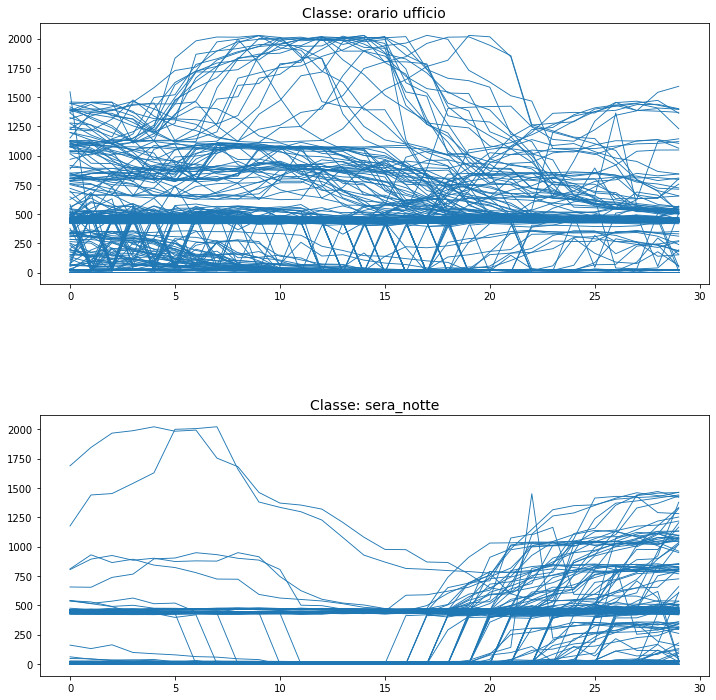

In [20]:
ts_l= []
ts_arr = []

for i in day0_split:
    ts = i[['Light','Temperature','CO2']].copy()
    ts_l.append(ts)

ts_size = day0_split[0][['Light','Temperature','CO2']].shape
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
X_train = np.array(ts_arr)

def divide_day(ts): 
     if ts['date'][ts.index[ts_size[0]//2]].hour <= 19 and ts['date'][ts.index[ts_size[0]//2]].hour >= 7:
        return 'orario ufficio'
     else:
        return 'sera_notte'
    
labels = np.array([divide_day(i) for i in day0_split])

y_train = preprocessing.LabelEncoder().fit_transform(labels)
plt.figure(figsize=(12,12))

for i, classe in enumerate(['orario ufficio', 'sera_notte']):
    plt.subplot(2, 1, i + 1)
    for x in X_train[labels == classe]:
        plt.plot(x, color='C0',linewidth=0.9)
    plt.title('Classe: {}'.format(classe), fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()


In [21]:
ts_l = []
ts_arr = []

for i in day_t1_split:
    ts = i[['Light','Temperature','CO2']].copy()
    ts_l.append(ts)

ts_size = day_t1_split[0][['Light','Temperature','CO2']].shape
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))

X_test1 = np.array(ts_arr)
y_test1 = preprocessing.LabelEncoder().fit_transform(labels)

In [22]:
ts_l = []
ts_arr = []

for i in day_t2_split:
    ts = i[['Light','Temperature','CO2']].copy()
    ts_l.append(ts)

ts_size = day_t2_split[0][['Light','Temperature','CO2']].shape
for i in ts_l:
    ts_arr.append(np.array(i).reshape(ts_size))
    
X_test2 = np.array(ts_arr)
y_test2 = preprocessing.LabelEncoder().fit_transform(labels)

In [23]:
X_train.shape,X_test2.shape

((240, 30, 3), (240, 30, 3))

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test2 = le.transform(y_test2)

In [26]:
n_timesteps, n_outputs, n_features = X_train.shape[1], len(np.unique(y_train)), X_train.shape[2] 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)
print("N. FEATURES: ", n_features)

TIMESTEPS:  30
N. LABELS:  2
N. FEATURES:  3


In [27]:
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [28]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\salva\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [29]:
def build_lstm2(n_timesteps, n_outputs, n_features):
    model = Sequential()
    model.add(LSTM(4, input_shape=(n_timesteps, n_features), return_sequences=True, 
                        kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    #1
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
    
    #3
    for _ in range(2):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.7))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [30]:
lstm2 = build_lstm2(n_timesteps, n_outputs, n_features)

In [31]:
lstm2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 4)             128       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 4)             16        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 4)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 4)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 4)             144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 4)             16        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 30, 4)            

In [32]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_lstm2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [33]:
history_lstm2 = lstm2.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Train on 192 samples, validate on 48 samples
Epoch 1/10


C:\Users\salva\anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


192/192 [==============================] - 487s 3s/step - loss: 0.7545 - accuracy: 0.5573 - val_loss: 0.6902 - val_accuracy: 0.6250
Epoch 2/10
192/192 [==============================] - 478s 2s/step - loss: 0.7268 - accuracy: 0.5781 - val_loss: 0.6871 - val_accuracy: 0.6250
Epoch 3/10
192/192 [==============================] - 467s 2s/step - loss: 0.6277 - accuracy: 0.6562 - val_loss: 0.6843 - val_accuracy: 0.6250
Epoch 4/10
192/192 [==============================] - 479s 2s/step - loss: 0.5830 - accuracy: 0.6771 - val_loss: 0.6811 - val_accuracy: 0.6250
Epoch 5/10
192/192 [==============================] - 467s 2s/step - loss: 0.5312 - accuracy: 0.7760 - val_loss: 0.6779 - val_accuracy: 0.6250
Epoch 6/10
192/192 [==============================] - 476s 2s/step - loss: 0.5281 - accuracy: 0.7604 - val_loss: 0.6746 - val_accuracy: 0.6250
Epoch 7/10
192/192 [==============================] - 480s 3s/step - loss: 0.4667 - accuracy: 0.7969 - val_loss: 0.6711 - val_accuracy: 0.6250
Epoch 8/10

In [37]:
y_pred = np.argmax(lstm2.predict(X_test2), axis=1)

print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.6208333333333333
F1-score [0.76606684 0.        ]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       149
           1       0.00      0.00      0.00        91

    accuracy                           0.62       240
   macro avg       0.31      0.50      0.38       240
weighted avg       0.39      0.62      0.48       240



C:\Users\salva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
